In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("C:\\Users\\LENOVO\\Downloads\\restaurant_menu_optimization_data.csv")
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [114]:
# Check missing values again
print(df.isna().sum())

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


In [115]:
print(df.isnull().sum())


RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


In [116]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None


In [117]:
# Mengonversi kolom 'Price' menjadi numerik
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Menampilkan tipe data kolom untuk memverifikasi
print(df.dtypes)

# Menampilkan beberapa baris pertama untuk memastikan perubahan
print(df.head())

RestaurantID      object
MenuCategory      object
MenuItem          object
Ingredients       object
Price            float64
Profitability     object
dtype: object
  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


Deskripsi Statistik Kolom 'Price':
 count    1000.00000
mean       12.81801
std         7.41713
min         2.01000
25%         4.86750
50%        12.53500
75%        17.69000
max        29.84000
Name: Price, dtype: float64

Distribusi Profitability:
 Profitability
Medium    495
High      386
Low       119
Name: count, dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


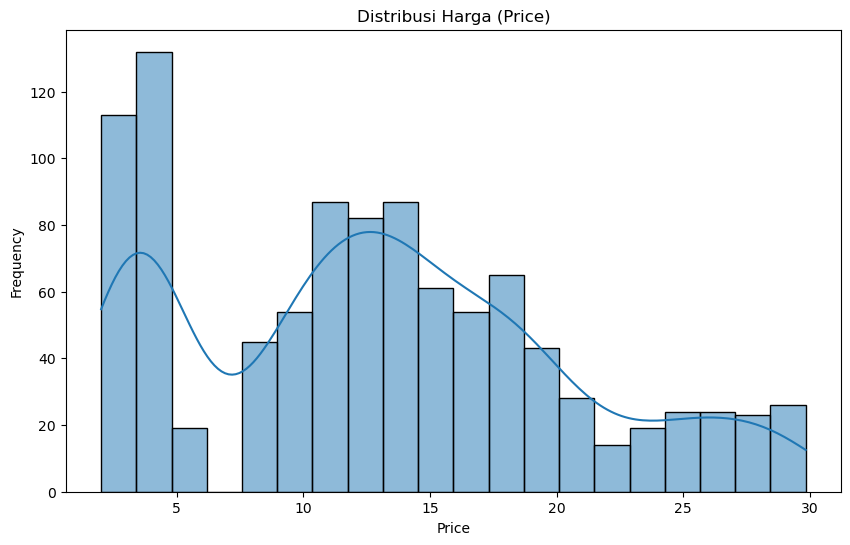

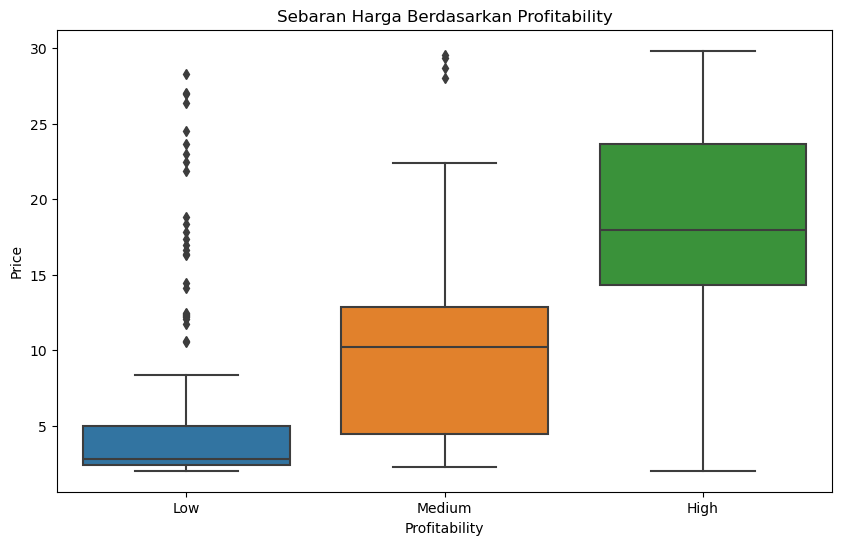

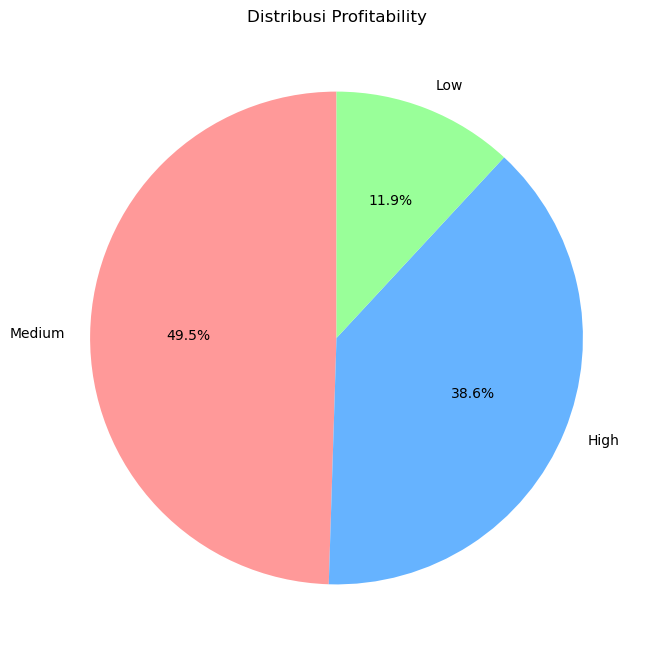

In [118]:
# Analisis Deskriptif
# Deskripsi statistik kolom 'Price'
price_description = df['Price'].describe()
print("Deskripsi Statistik Kolom 'Price':\n", price_description)

# Distribusi Profitability
profitability_counts = df['Profitability'].value_counts()
print("\nDistribusi Profitability:\n", profitability_counts)

# Visualisasi

# 1. Histogram untuk distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribusi Harga (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot untuk sebaran harga berdasarkan Profitability
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profitability', y='Price', data=df)
plt.title('Sebaran Harga Berdasarkan Profitability')
plt.xlabel('Profitability')
plt.ylabel('Price')
plt.show()

# 3. Pie Chart untuk distribusi Profitability
plt.figure(figsize=(8, 8))
df['Profitability'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi Profitability')
plt.ylabel('')
plt.show()

In [119]:
print(df.isnull().sum())

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['Profitability'] = label_encoder.fit_transform(df['Profitability'])
df['RestaurantID'] = label_encoder.fit_transform(df['RestaurantID'])
df['MenuCategory'] = label_encoder.fit_transform(df['MenuCategory'])
df['MenuItem'] = label_encoder.fit_transform(df['MenuItem'])
df['Ingredients'] = label_encoder.fit_transform(df['Ingredients'])



In [121]:
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,2,1,11,3,2.55,1
1,0,0,12,2,11.12,2
2,2,2,9,1,18.66,0
3,2,3,2,0,29.55,0
4,1,3,6,0,17.73,2
...,...,...,...,...,...,...
995,2,1,11,3,2.16,1
996,0,0,1,2,11.86,2
997,2,3,15,0,20.57,0
998,1,2,14,1,18.80,0


In [122]:
X = df.drop('Profitability', axis=1)
y = df['Profitability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.00      0.00      0.00        25
           2       0.78      0.96      0.86        98

    accuracy                           0.82       200
   macro avg       0.55      0.62      0.59       200
weighted avg       0.72      0.82      0.77       200

Decision Tree Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.58      0.56      0.57        25
           2       0.87      0.91      0.89        98

    accuracy                           0.83       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.83      0.83      0.83       200



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.76      0.52      0.62        25
           2       0.91      0.95      0.93        98

    accuracy                           0.89       200
   macro avg       0.86      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



Logistic Regression Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.00      0.00      0.00        25
           2       0.78      0.96      0.86        98

    accuracy                           0.82       200
   macro avg       0.55      0.62      0.59       200
weighted avg       0.72      0.82      0.77       200

Decision Tree Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        77
           1       0.59      0.52      0.55        25
           2       0.86      0.91      0.88        98

    accuracy                           0.82       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.82      0.82      0.82       200



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        77
           1       0.87      0.52      0.65        25
           2       0.91      0.96      0.94        98

    accuracy                           0.90       200
   macro avg       0.89      0.81      0.83       200
weighted avg       0.90      0.90      0.89       200

K-Nearest Neighbors Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        77
           1       0.93      0.52      0.67        25
           2       0.88      0.93      0.91        98

    accuracy                           0.88       200
   macro avg       0.89      0.79      0.82       200
weighted avg       0.88      0.88      0.87       200



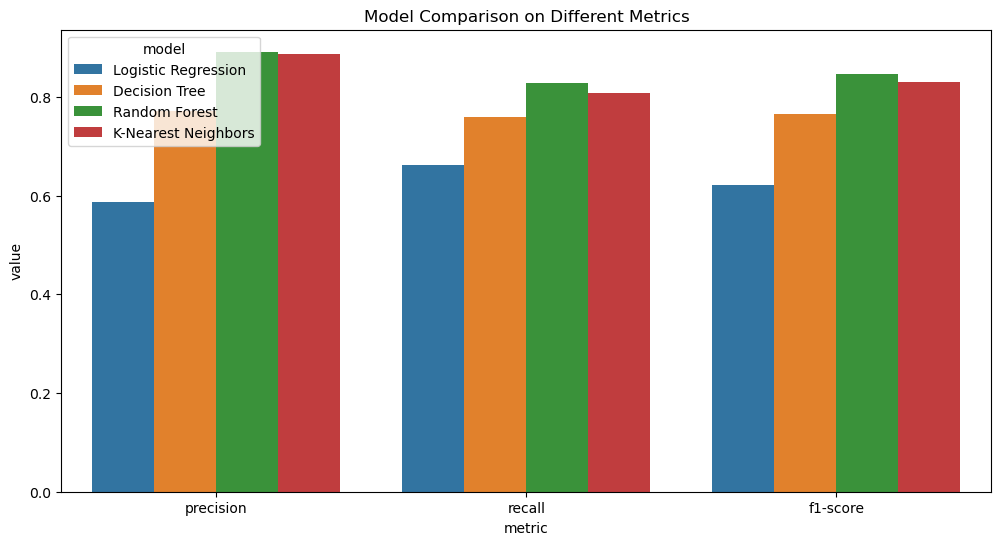

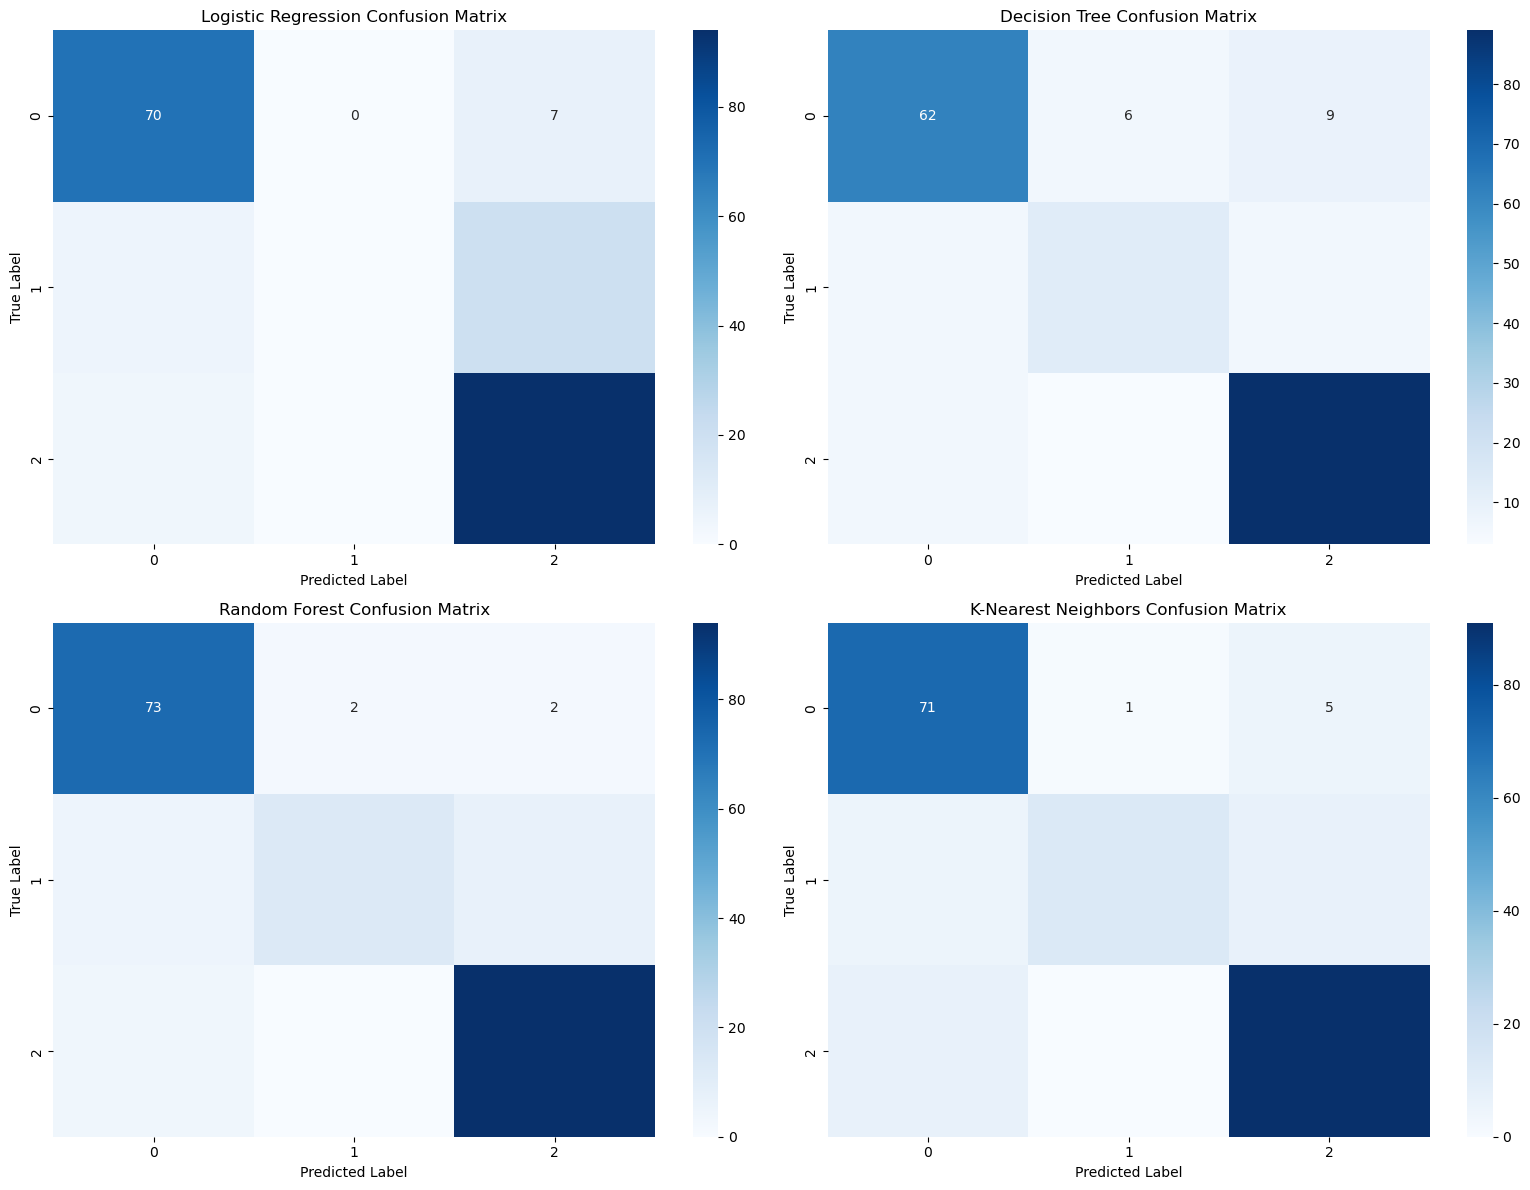

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000) ,
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }
    
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

# Visualize metrics
metrics = ['precision', 'recall', 'f1-score']
metrics_df_list = []

for name, result in results.items():
    for metric in metrics:
        metric_values = [result['report'][label][metric] for label in result['report'].keys() if label != 'accuracy']
        avg_metric = sum(metric_values) / len(metric_values)
        metrics_df_list.append({'model': name, 'metric': metric, 'value': avg_metric})

metrics_df = pd.DataFrame(metrics_df_list)

plt.figure(figsize=(12, 6))
sns.barplot(x='metric', y='value', hue='model', data=metrics_df)
plt.title('Model Comparison on Different Metrics')
plt.show()

# Visualize confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [126]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Inisialisasi model regresi (contoh: Linear Regression)
model_regresi = LinearRegression()

# Latih model dengan data pelatihan
model_regresi.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = model_regresi.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Cetak hasil metrik evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.6010172129029199
Mean Squared Error (MSE): 0.46412594560848874
Root Mean Squared Error (RMSE): 0.6812678956243929
R-squared (R²): 0.4628016486489901
